In [39]:
import pandas as pd
import random
import re
import nltk
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk.util import ngrams
import math

In [40]:
arquivo_csv = "BregasRecife - Página1.csv"
df = pd.read_csv(arquivo_csv, encoding='utf-8')

In [41]:
texto = " ".join(df["letra"].dropna()).lower()

In [42]:
tokens = re.findall(r'\b\w+\b', texto)

In [43]:
# Criando modelo de trigramas
trigramas = list(ngrams(tokens, 3))
modelo = defaultdict(lambda: defaultdict(int))

In [44]:
for w1, w2, w3 in trigramas:
    modelo[(w1, w2)][w3] += 1

In [45]:
# Convertendo as contagens em probabilidades
for w1_w2 in modelo:
    total = float(sum(modelo[w1_w2].values()))
    for w3 in modelo[w1_w2]:
        modelo[w1_w2][w3] /= total

In [46]:
# Função para calcular a entropia de Shannon
def calcular_entropia(modelo):
    entropia_total = 0
    for w1_w2 in modelo:
        for w3, prob in modelo[w1_w2].items():
            entropia_total -= prob * math.log(prob, 2)  # Cálculo da entropia
    return entropia_total

In [47]:
entropia = calcular_entropia(modelo)
print(f"Entropia do modelo: {entropia:.4f}")

Entropia do modelo: 722.5289


In [48]:
def gerar_texto(modelo, tamanho=50):
    texto_gerado = []
    inicio = random.choice(list(modelo.keys()))
    texto_gerado.extend(inicio)

    for _ in range(tamanho - 2):
        prev = tuple(texto_gerado[-2:])
        if prev not in modelo:
            break
        palavras, probs = zip(*modelo[prev].items())
        proxima_palavra = random.choices(palavras, weights=probs)[0]
        texto_gerado.append(proxima_palavra)

    return ' '.join(texto_gerado)

In [49]:
texto_gerado = gerar_texto(modelo, 50)
print("Texto gerado:", texto_gerado)

Texto gerado: você agradeço por te ter eu sempre volto volto pra ti volto volto eu sempre volto volto pra ti volto volto eu sempre volto volto pra você preocupa não pra essa foda que é o louco entre nós eu que disse adeus querendo ficar você que se sente muito mais


In [50]:
frequencias = defaultdict(int)
for w1_w2 in modelo:
    for w3 in modelo[w1_w2]:
        frequencias[w3] += modelo[w1_w2][w3]

In [51]:
palavras, counts = zip(*sorted(frequencias.items(), key=lambda x: x[1], reverse=True))

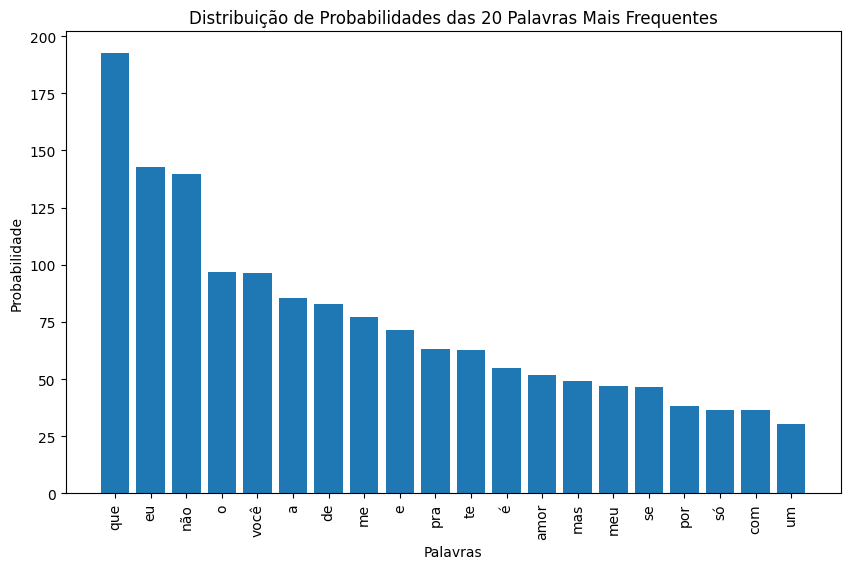

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(palavras[:20], counts[:20])
plt.xticks(rotation=90)
plt.title("Distribuição de Probabilidades das 20 Palavras Mais Frequentes")
plt.xlabel("Palavras")
plt.ylabel("Probabilidade")
plt.show()